This is the notebook to use the summary dataframe to generate figure 1.

In [84]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
BASEDIR = '/home/yiheng/analysis/WGS'

In [86]:
# get the summary dataframe
FC1_barcode = os.path.join(BASEDIR, 'run1_barcode.tab')
FC2_barcode = os.path.join(BASEDIR, 'run2_barcode.tab')
FC3_barcode = os.path.join(BASEDIR, 'FAH05432_barcode.tab')
FC4_barcode = os.path.join(BASEDIR, 'FAH05731_barcode.tab')

FC1_hit = os.path.join(BASEDIR, 'run1_hit.tab')
FC2_hit = os.path.join(BASEDIR, 'run2_hit.tab')
FC3_hit = os.path.join(BASEDIR, 'FAH05432_hit.tab')
FC4_hit = os.path.join(BASEDIR, 'FAH05731_hit.tab')

FC1_barcode_df = pd.read_csv(FC1_barcode, sep = '\t')
FC2_barcode_df = pd.read_csv(FC2_barcode, sep = '\t')
FC3_barcode_df = pd.read_csv(FC3_barcode, sep = '\t')
FC4_barcode_df = pd.read_csv(FC4_barcode, sep = '\t')

FC1_hit_df = pd.read_csv(FC1_hit, sep = '\t')
FC2_hit_df = pd.read_csv(FC2_hit, sep = '\t')
FC3_hit_df = pd.read_csv(FC3_hit, sep = '\t')
FC4_hit_df = pd.read_csv(FC4_hit, sep = '\t')


In [87]:
barcode_df = pd.concat([FC1_barcode_df, FC2_barcode_df, FC3_barcode_df, FC4_barcode_df], axis=1).T
hit_df = pd.concat([FC1_hit_df, FC2_hit_df, FC3_hit_df, FC4_hit_df], axis=1).T

In [88]:
hit_df

,0,1,2
run1,0.929160,0.006847,0.063979
run2,0.803615,0.011764,0.184605
FAH05432,0.922226,0.006527,0.071231
FAH05731,0.979121,0.009013,0.011835


In [89]:
hit_df[0]

run1        0.929160
run2        0.803615
FAH05432    0.922226
FAH05731    0.979121
Name: 0, dtype: float64

In [90]:
# from raw value to percentage
barcode01_percentage = [x*100 for x in barcode_df[0]]
barcode02_percentage = [x*100 for x in barcode_df[1]]
barcode03_percentage = [x*100 for x in barcode_df[2]]
barcode04_percentage = [x*100 for x in barcode_df[3]]
barcode05_percentage = [x*100 for x in barcode_df[4]]
unclassified_percentage = [x*100 for x in barcode_df[5]]

rghit_percentage = [x*100 for x in hit_df[0]]
nthit_percentage = [x*100 for x in hit_df[1]]
nohit_percentage = [x*100 for x in hit_df[2]]

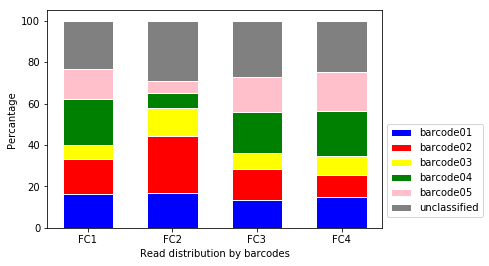

In [91]:
# plot figure 1A
barWidth = 0.6
r = [0,1,2,3]
plt.bar(r, barcode01_percentage, label = 'barcode01', color='blue', edgecolor='white', width=barWidth)
plt.bar(r, barcode02_percentage, label = 'barcode02', bottom=barcode01_percentage, color='red', edgecolor='white', width=barWidth)
plt.bar(r, barcode03_percentage, label = 'barcode03', bottom=[i+j for i,j in zip(barcode01_percentage, barcode02_percentage)], color='yellow', edgecolor='white', width=barWidth)
plt.bar(r, barcode04_percentage, label = 'barcode04', bottom=[i+j+k for i,j,k in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage)], color='green', edgecolor='white', width=barWidth)
plt.bar(r, barcode05_percentage, label = 'barcode05', bottom=[i+j+k+l for i,j,k,l in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage, barcode04_percentage)], color='pink', edgecolor='white', width=barWidth)
plt.bar(r, unclassified_percentage, label = 'unclassified', bottom=[i+j+k+l+m for i,j,k,l,m in zip(barcode01_percentage, barcode02_percentage, barcode03_percentage, barcode04_percentage, barcode05_percentage)], color='grey', edgecolor='white', width=barWidth)

plt.xticks(r, ['FC1', 'FC2', 'FC3', 'FC4'])
plt.xlabel("Read distribution by barcodes")
plt.ylabel("Percantage")
#lt.legend((r[0], r[1], nohit_percentage), ('Reads hit reference genomes', 'Reads hit ncbi nucleotide database', 'Reads have no hit to both reference genomes and ncbi nucleotide database'))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.show()

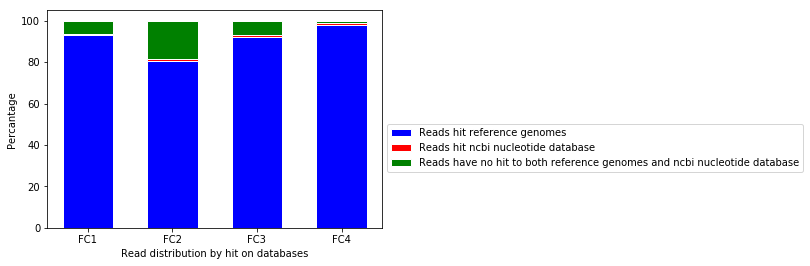

In [92]:
# plot figure 1B
barWidth = 0.6
r = [0,1,2,3]
plt.bar(r, rghit_percentage, label = 'Reads hit reference genomes', color='blue', edgecolor='white', width=barWidth)
plt.bar(r, nthit_percentage, bottom=rghit_percentage, label = 'Reads hit ncbi nucleotide database', color='red', edgecolor='white', width=barWidth)
plt.bar(r, nohit_percentage, bottom=[i+j for i,j in zip(rghit_percentage, nthit_percentage)], label = 'Reads have no hit to both reference genomes and ncbi nucleotide database', color='green', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, ['FC1', 'FC2', 'FC3', 'FC4'])
plt.xlabel("Read distribution by hit on databases")
plt.ylabel("Percantage")
#lt.legend((r[0], r[1], nohit_percentage), ('Reads hit reference genomes', 'Reads hit ncbi nucleotide database', 'Reads have no hit to both reference genomes and ncbi nucleotide database'))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.show()

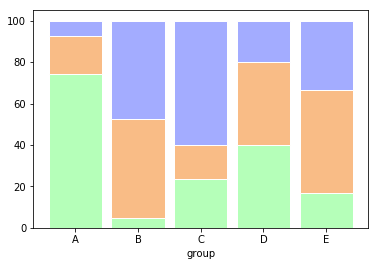

In [68]:
# Example that I followed

r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

# Show graphic
plt.show()